### What is regularization:
* Regularization refers to a set of different techniques that lower the complexity of a neural network model during training,<br>
and thus prevent the overfitting. 

### Lasso:
 *  Least Absolute Shrinkage and Selection Operator <br>
 *  If a model uses the L1 regularization technique, then it is called lasso regression. <br>
 *  Adds the “absolute value of magnitude” of the coefficient as a penalty term to the loss function <br>
 *  Also performs automatic feature selection <br>

### Ridge:
   * Ridge regression is also referred to as L2 Regularization.<br>
   * Adds the "squared magnitude" of the coefficient as the penalty term to the loss function.  <br>

### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Storing the dataset

In [2]:
df_train = pd.read_csv(r"C:\Users\raji9\OneDrive\Desktop\Notebooks\AML-lab\AML-1\House_price_prediction\train.csv")

In [3]:
df_test = pd.read_csv(r"C:\Users\raji9\OneDrive\Desktop\Notebooks\AML-lab\AML-1\House_price_prediction\test.csv")

### Basic Analysis

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.shape

(1460, 81)

In [6]:
df_test.shape

(1459, 80)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [9]:
for i in df_train.columns:
    if df_train[i].isnull().any() == True:
        print(i,end = " ")
        print(df_train.loc[lambda df_train : df_train[i].isnull() == True].shape[0])

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [10]:
df_train["Electrical"].fillna(df_train["Electrical"].mode()[0],inplace = True)

In [11]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
for i in df_test.columns:
    if df_train[i].isnull().sum() > 500:
        print("Dropped Columns: ",i)
        df_train.drop(columns = [i], axis=1, inplace=True)
        df_test.drop(columns= [i], axis=1, inplace = True)

Dropped Columns:  Alley
Dropped Columns:  FireplaceQu
Dropped Columns:  PoolQC
Dropped Columns:  Fence
Dropped Columns:  MiscFeature


In [13]:
df_train.shape

(1460, 76)

### Encoding

In [14]:
numeric_feature = df_train.select_dtypes(include=["int64","float64"]).columns

In [15]:
numeric_feature

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
categorical_feature = df_train.select_dtypes(exclude=["int64","float64"]).columns

In [17]:
categorical_feature

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
Ord_encoder = OrdinalEncoder()

In [19]:
for i in categorical_feature:
    df_train[[i]] = Ord_encoder.fit_transform(df_train[[i]])
    df_test[[i]] = Ord_encoder.fit_transform(df_test[[i]])

In [20]:
df_train.dtypes.value_counts()

float64    41
int64      35
dtype: int64

In [21]:
df_test.dtypes.value_counts()

float64    49
int64      26
dtype: int64

No Objects...

### Outlier Analysis & Removal

<AxesSubplot: xlabel='SalePrice'>

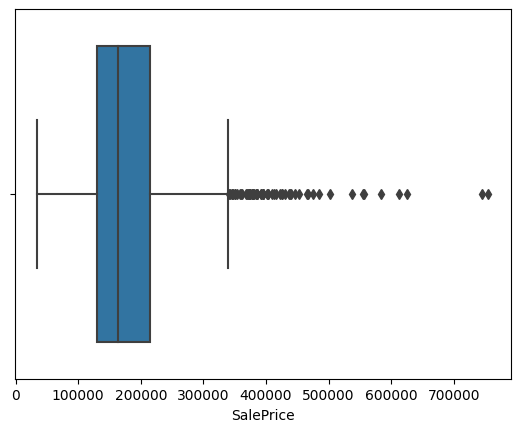

In [22]:
sns.boxplot(x= df_train.SalePrice)

In [23]:
df_train.SalePrice.quantile([.25,.5,.75])

0.25    129975.0
0.50    163000.0
0.75    214000.0
Name: SalePrice, dtype: float64

In [24]:
z = np.abs(stats.zscore(df_train.SalePrice))

In [25]:
df_train.drop(np.where(z>3)[0],axis = 0,inplace = True)

In [26]:
df_train.shape

(1438, 76)

In [27]:
df_train.fillna(method = "bfill", inplace = True )

In [28]:
df_test.fillna(method = "bfill", inplace = True )

<AxesSubplot: xlabel='SalePrice'>

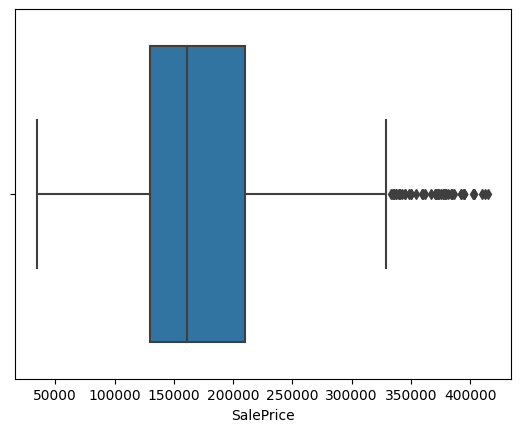

In [29]:
sns.boxplot(x= df_train.SalePrice)

In [30]:
df_train.SalePrice.quantile([.25,.5,.75])

0.25    129500.0
0.50    161500.0
0.75    210000.0
Name: SalePrice, dtype: float64

In [31]:
# Q1=df_train.SalePrice.quantile(.25)
# Q2=df_train.SalePrice.quantile(0.5)
# Q3=df_train.SalePrice.quantile(0.75)

In [32]:
# IQR = Q3-Q1
# IQR

In [33]:
# lower = Q1-1.5*IQR
# upper = Q3+1.5*IQR

In [34]:
# print(lower,"and",upper)

In [35]:
# df_train[(df_train.SalePrice>lower) & (df_train.SalePrice<upper)].shape[0]

### Splitting of data

In [36]:
X = df_train.drop("SalePrice",axis = 1)

In [37]:
Y = df_train.SalePrice

### Important Feature Selection

In [38]:
fs = SelectKBest(score_func=f_regression, k=50)

In [39]:
X.fillna(method = "bfill", inplace = True )

In [40]:
X_selected = fs.fit_transform(X, Y)

In [41]:
X_selected

array([[3.000e+00, 6.500e+01, 8.450e+03, ..., 6.100e+01, 0.000e+00,
        4.000e+00],
       [3.000e+00, 8.000e+01, 9.600e+03, ..., 0.000e+00, 0.000e+00,
        4.000e+00],
       [3.000e+00, 6.800e+01, 1.125e+04, ..., 4.200e+01, 0.000e+00,
        4.000e+00],
       ...,
       [3.000e+00, 6.600e+01, 9.042e+03, ..., 6.000e+01, 0.000e+00,
        4.000e+00],
       [3.000e+00, 6.800e+01, 9.717e+03, ..., 0.000e+00, 1.120e+02,
        4.000e+00],
       [3.000e+00, 7.500e+01, 9.937e+03, ..., 6.800e+01, 0.000e+00,
        4.000e+00]])

In [42]:
X_selected.shape

(1438, 50)

### Model Selection

In [43]:
x_train,x_test, y_train, y_test = train_test_split(X_selected,Y)

#### Lasso with cv

In [44]:
la = LassoCV()

<IPython.core.display.Javascript object>

In [45]:
la.fit(x_train,y_train)

LassoCV()

In [46]:
yl = la.predict(x_test)

In [47]:
r2_score(y_test,yl)

0.7265540455830419

#### Ridge with cv

In [48]:
ri = RidgeCV()

<IPython.core.display.Javascript object>

In [49]:
ri.fit(x_train,y_train)

RidgeCV()

In [50]:
yr = ri.predict(x_test)

In [51]:
r2_score(y_test,yr)

0.7819819483411486

#### Linear Regression

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
yp = lr.predict(x_test)

In [55]:
r2_score(y_test,yp)

0.7804638320877619

#### Random Forest

In [56]:
rf = RandomForestRegressor(max_depth=100,n_estimators=500)

In [57]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, n_estimators=500)

In [58]:
ypr = rf.predict(x_test)

In [59]:
r2_score(y_test,ypr)

0.8445979617256091

### Hyperparameter Tuning

In [60]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100,200]}

In [61]:
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [62]:
model_cv.best_params_

{'alpha': 200}

In [63]:
model_cv.best_estimator_

Lasso(alpha=200)

In [64]:
alpha = model_cv.best_estimator_.alpha
# max_iter = model_cv.best_estimator_.max_iter
lasso = Lasso(alpha=alpha)

lasso.fit(x_train, y_train)
lasso.coef_

<IPython.core.display.Javascript object>

array([-2.65009973e+03, -4.80063718e+01,  5.50328141e-01, -1.63659959e+03,
        3.25747427e+02,  4.57689482e+02, -2.02835276e+03,  1.31979241e+04,
        3.93263856e+01,  2.62791542e+02,  2.54561427e+03, -1.49361536e+03,
        9.61139563e+02,  1.81996231e+01, -5.99487429e+03,  8.34791598e+02,
        0.00000000e+00, -6.26367382e+03, -2.95679177e+03,  5.81845932e-01,
       -4.35789502e+00, -1.36206683e+00, -5.79264702e+02, -8.41538310e+02,
        3.96536141e+03,  8.11940376e+01,  5.30150935e+01,  4.41032547e+01,
       -5.73937253e+00,  8.16189770e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.33360042e+04, -6.48349736e+03,  1.55446172e+03,
        4.04806916e+03,  4.09461740e+03, -1.15215292e+03, -1.09206650e+02,
       -2.24213022e+03,  1.20023473e+04, -2.19652798e-01,  0.00000000e+00,
        2.14816141e+03,  3.17840606e+03,  2.40352881e+01,  1.71527294e+01,
       -3.52959819e+00,  2.86990256e+03])

In [65]:
y_pred = lasso.predict(x_test)
print(r2_score(y_pred, y_test))

0.7887807248842562


In [83]:
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = 10, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitting 10 folds for each of 33 candidates, totalling 330 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [84]:
model_cv.best_estimator_

Ridge(alpha=50)

In [85]:
alpha = model_cv.best_estimator_.alpha
ridge= Ridge(alpha=alpha)

ridge.fit(x_train, y_train)
lasso.coef_

<IPython.core.display.Javascript object>

array([-2.65009973e+03, -4.80063718e+01,  5.50328141e-01, -1.63659959e+03,
        3.25747427e+02,  4.57689482e+02, -2.02835276e+03,  1.31979241e+04,
        3.93263856e+01,  2.62791542e+02,  2.54561427e+03, -1.49361536e+03,
        9.61139563e+02,  1.81996231e+01, -5.99487429e+03,  8.34791598e+02,
        0.00000000e+00, -6.26367382e+03, -2.95679177e+03,  5.81845932e-01,
       -4.35789502e+00, -1.36206683e+00, -5.79264702e+02, -8.41538310e+02,
        3.96536141e+03,  8.11940376e+01,  5.30150935e+01,  4.41032547e+01,
       -5.73937253e+00,  8.16189770e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.33360042e+04, -6.48349736e+03,  1.55446172e+03,
        4.04806916e+03,  4.09461740e+03, -1.15215292e+03, -1.09206650e+02,
       -2.24213022e+03,  1.20023473e+04, -2.19652798e-01,  0.00000000e+00,
        2.14816141e+03,  3.17840606e+03,  2.40352881e+01,  1.71527294e+01,
       -3.52959819e+00,  2.86990256e+03])

In [86]:
y_r = ridge.predict(x_test)

In [87]:
r2_score(y_test,y_r)

0.7849874099974318